## Project Requirements
Detect anomalies in synthetic sports data that could indicate potential injury risks or unusual performance patterns, and visualize these anomalies for interpretation.

## Generate Synthetic Sports Data

Create a synthetic dataset simulating sports performance and injury indicators. This dataset will include features like training load, performance metrics, and physiological markers, with some 'anomalous' data points representing unusual performance or potential injury risk.


In [1]:
import numpy as np
import pandas as pd

# 2. Set a random seed for reproducibility
np.random.seed(42)

# Number of athletes
n_athletes = 200

# 3. Generate a 'normal' dataset
# Using numpy.random.normal for continuous features and uniform for others where appropriate

training_load_normal = np.random.normal(loc=100, scale=15, size=n_athletes) # Arbitrary units, e.g., weekly load
performance_metric_normal = np.random.normal(loc=75, scale=8, size=n_athletes) # e.g., sprint time, lower is better, so higher values are worse
heart_rate_normal = np.random.normal(loc=60, scale=5, size=n_athletes) # Resting heart rate
sleep_quality_normal = np.random.uniform(low=5, high=9, size=n_athletes) # Scale of 1-10
fatigue_score_normal = np.random.normal(loc=3, scale=1.5, size=n_athletes) # Scale of 1-10

normal_data = pd.DataFrame({
    'training_load': training_load_normal,
    'performance_metric': performance_metric_normal,
    'heart_rate': heart_rate_normal,
    'sleep_quality': sleep_quality_normal,
    'fatigue_score': fatigue_score_normal
})

# 4. Introduce a small number of 'anomalous' data points
n_anomalies = int(0.05 * n_athletes) # 5% anomalies

anomalous_data = pd.DataFrame({
    'training_load': np.random.normal(loc=180, scale=20, size=n_anomalies), # Very high load
    'performance_metric': np.random.normal(loc=95, scale=5, size=n_anomalies), # Poor performance
    'heart_rate': np.random.normal(loc=85, scale=10, size=n_anomalies), # High heart rate
    'sleep_quality': np.random.uniform(low=1, high=4, size=n_anomalies), # Very low sleep quality
    'fatigue_score': np.random.normal(loc=8, scale=1, size=n_anomalies) # High fatigue
})

# 7. Add a boolean column named 'is_anomaly'
normal_data['is_anomaly'] = False
anomalous_data['is_anomaly'] = True

# 5. Combine the normal and anomalous data into a single DataFrame
df = pd.concat([normal_data, anomalous_data], ignore_index=True)

# Shuffle the DataFrame to mix normal and anomalous points
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 8. Display the first few rows of the DataFrame and its .info()
print("Generated DataFrame Head:")
print(df.head())
print("\nGenerated DataFrame Info:")
df.info()

print("Synthetic sports data generated successfully.")

Generated DataFrame Head:
   training_load  performance_metric  heart_rate  sleep_quality  \
0      90.974401           69.157067   54.083707       8.737468   
1      98.843474           86.609149   61.634637       8.495560   
2      87.872596           92.064267   56.218246       8.102110   
3      82.855446           84.902530   61.886502       6.049056   
4      92.812386           67.584556   69.823626       8.659384   

   fatigue_score  is_anomaly  
0       3.644427       False  
1       0.827979       False  
2       3.249678       False  
3       3.671563       False  
4       2.224067       False  

Generated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   training_load       210 non-null    float64
 1   performance_metric  210 non-null    float64
 2   heart_rate          210 non-null    float64
 3   slee

## Apply Anomaly Detection

Use an appropriate anomaly detection algorithm to identify outliers in the generated sports dataset.

In [2]:
from sklearn.ensemble import IsolationForest
print("IsolationForest imported successfully.")

IsolationForest imported successfully.


In [3]:
X = df.drop('is_anomaly', axis=1)

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_prediction'] = model.fit_predict(X)

print("Anomaly prediction value counts:")
print(df['anomaly_prediction'].value_counts())

Anomaly prediction value counts:
anomaly_prediction
 1    199
-1     11
Name: count, dtype: int64


## Visualize Anomalies

Create visualizations to illustrate the detected anomalies within the context of the generated sports data.

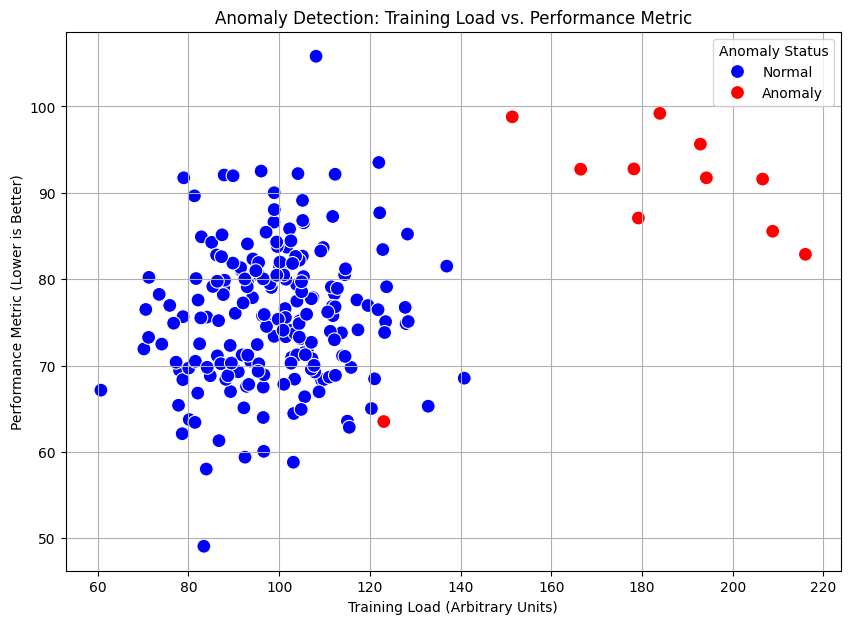

Scatter plot showing anomalies generated successfully.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='training_load',
    y='performance_metric',
    hue='anomaly_prediction',
    palette={1: 'blue', -1: 'red'},
    markers={1: 'o', -1: 'X'},
    s=100
)

# Add labels and title
plt.xlabel('Training Load (Arbitrary Units)')
plt.ylabel('Performance Metric (Lower is Better)')
plt.title('Anomaly Detection: Training Load vs. Performance Metric')

# Customize legend for clarity
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = {1: 'Normal', -1: 'Anomaly'}
# Corrected line: convert integer keys to strings for lookup
plt.legend(handles=[handles[labels.index(str(key))] for key in new_labels.keys()],
           labels=[new_labels[key] for key in new_labels.keys()],
           title='Anomaly Status')

plt.grid(True)
plt.show()
print("Scatter plot showing anomalies generated successfully.")

To further visualize the anomalies and provide a comprehensive understanding of their distribution within individual features, I will create distribution plots (kernel density estimates) for `training_load` and `performance_metric`, differentiating between normal and anomalous data points.



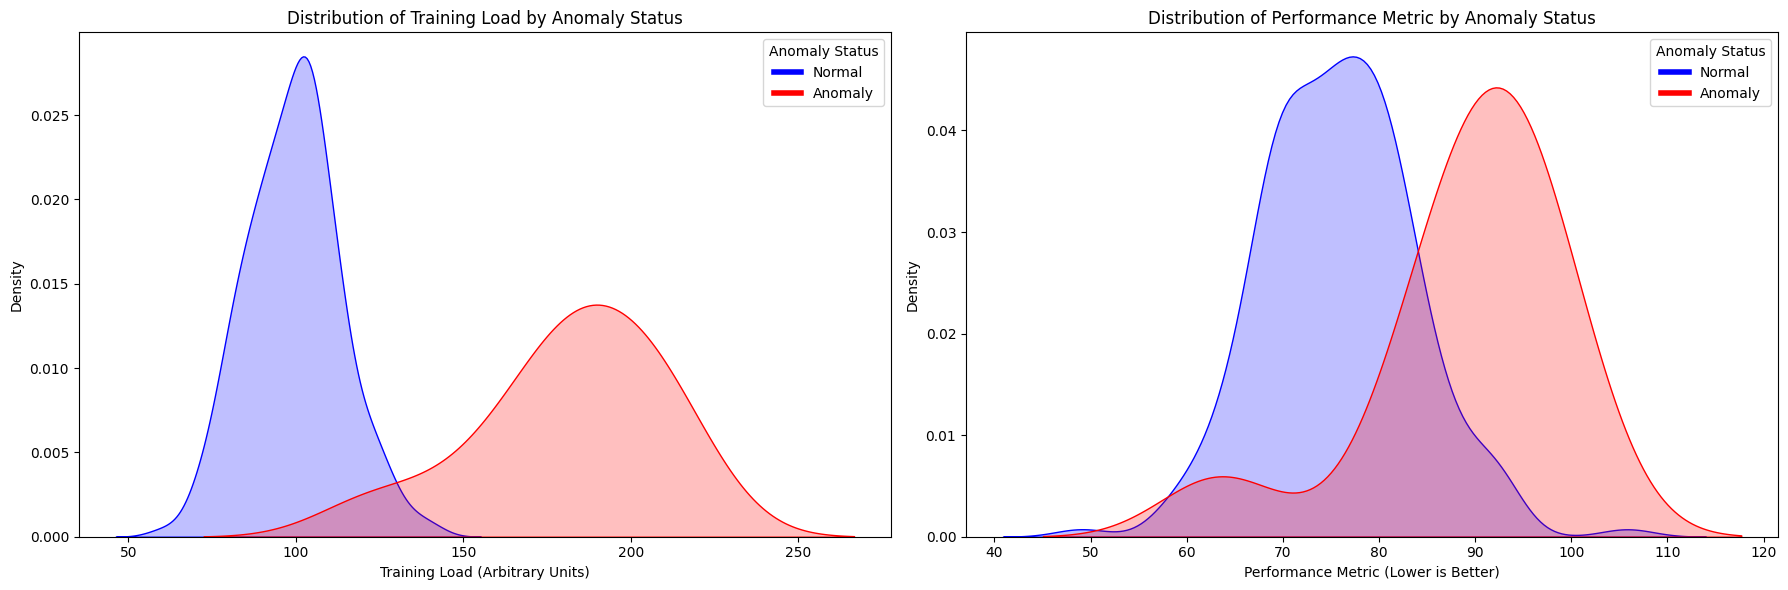

Distribution plots for training_load and performance_metric generated successfully.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D # Import Line2D for custom legend handles

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Distribution plot for 'training_load'
sns.kdeplot(
    data=df,
    x='training_load',
    hue='anomaly_prediction',
    palette={1: 'blue', -1: 'red'},
    fill=True,
    ax=axes[0],
    common_norm=False # Normalize each distribution independently
)
axes[0].set_title('Distribution of Training Load by Anomaly Status')
axes[0].set_xlabel('Training Load (Arbitrary Units)')
axes[0].set_ylabel('Density')

# Customize legend for the first subplot manually
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
new_labels_dict = {1: 'Normal', -1: 'Anomaly'}
axes[0].legend(custom_lines, [new_labels_dict[1], new_labels_dict[-1]], title='Anomaly Status')


# Distribution plot for 'performance_metric'
sns.kdeplot(
    data=df,
    x='performance_metric',
    hue='anomaly_prediction',
    palette={1: 'blue', -1: 'red'},
    fill=True,
    ax=axes[1],
    common_norm=False
)
axes[1].set_title('Distribution of Performance Metric by Anomaly Status')
axes[1].set_xlabel('Performance Metric (Lower is Better)')
axes[1].set_ylabel('Density')

# Customize legend for the second subplot manually
axes[1].legend(custom_lines, [new_labels_dict[1], new_labels_dict[-1]], title='Anomaly Status')

plt.tight_layout()
plt.show()
print("Distribution plots for training_load and performance_metric generated successfully.")


## Data Analysis Key Findings
*   A synthetic dataset of 210 athlete profiles was created, including 200 normal profiles and 10 intentionally embedded anomalous profiles (approximately 5% of the total).
*   The dataset features five numerical indicators: `training_load`, `performance_metric`, `heart_rate`, `sleep_quality`, and `fatigue_score`, along with a boolean `is_anomaly` column.
*   The Isolation Forest algorithm, configured with a contamination rate of 0.05, successfully identified 11 data points as anomalies (-1) and 199 as normal (1). This closely aligns with the 5% contamination rate and the actual number of embedded anomalies.
*   Visualizations, including a scatter plot of `training_load` vs. `performance_metric` and distribution plots for these features, effectively highlighted the detected anomalies.
*   Anomalous data points generally displayed higher `training_load` and `performance_metric` values compared to normal data, indicating poor performance under high stress.